<a href="https://colab.research.google.com/github/adalahardana/hasil-kuliah/blob/main/deeplearning_dataposyandu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# ====== Segment 1: Import & Load ======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()


df = pd.read_excel("DataNewStatistika.xlsx")
print("Data awal:")
display(df.head())


Saving DataNewStatistika.xlsx to DataNewStatistika (2).xlsx
Data awal:


,nama_balita,jenis_kelamin,nama_ayah,nama_ibu,tanggal_lahir,RT,posyandu,tahun1,tahun2,tahun3,tahun4,tahun5,riwayat_penyakit,status
0,Asifa Putri,P,Cipto Saputra,Mega Saputri,2008-06-16,4,Posyandu Tulip,8.5,11.2,14.1,15.8,18.6,NaN,Sehat
1,Nadira,P,Agus Susanto,Sri Utomo,2015-10-26,5,Posyandu Melati,11.4,12.5,14.4,15.7,17.7,NaN,Sehat
2,Miftahul Nurul,P,Rahman Saputra,Lestari Firmansyah,2017-07-07,3,Posyandu Bugenvil,7.2,10.6,12.4,15.4,16.9,NaN,Sehat
3,Tania,P,Andi Santoso,Maya Firmansyah,2009-12-19,1,Posyandu Melati,11.7,14.1,14.9,16.9,19.2,NaN,Sehat
4,Hana,P,Galih Gunawan,Siska Wijaya,2009-04-26,4,Posyandu Bugenvil,9.1,11.6,12.5,14.8,18.3,NaN,Sehat



=== Statistik Deskriptif (Mean, Std, Min, Max, dll) ===


,count,mean,std,min,25%,50%,75%,max
tahun1,350.0,9.502286,1.043877,6.1,8.8,9.5,10.2,12.5
tahun2,350.0,11.976857,0.998886,9.2,11.3,11.9,12.6,15.0
tahun3,350.0,13.753714,1.039961,10.5,13.1,13.8,14.5,16.3
tahun4,350.0,15.544000,1.095082,11.5,14.8,15.6,16.3,18.6
tahun5,350.0,17.605429,1.152274,13.1,16.9,17.7,18.4,20.7



=== Statistik Tambahan (Median, Modus, Varians, Skewness, Kurtosis) ===


,mean,median,modus,varian,std_deviasi,skewness,kurtosis
tahun1,9.502286,9.5,9.7,1.089680,1.043877,-0.116549,-0.112193
tahun2,11.976857,11.9,11.6,0.997772,0.998886,0.151709,0.123576
tahun3,13.753714,13.8,13.9,1.081519,1.039961,-0.097450,-0.069921
tahun4,15.544000,15.6,15.8,1.199205,1.095082,-0.240604,0.288113
tahun5,17.605429,17.7,17.7,1.327735,1.152274,-0.238667,0.415776


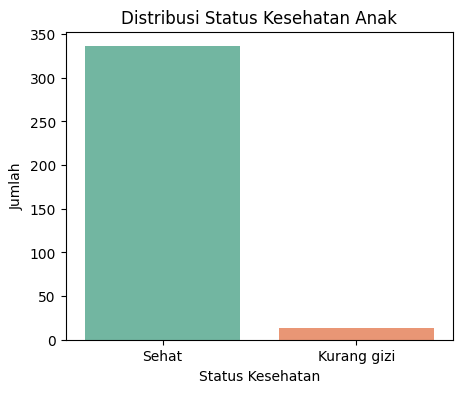

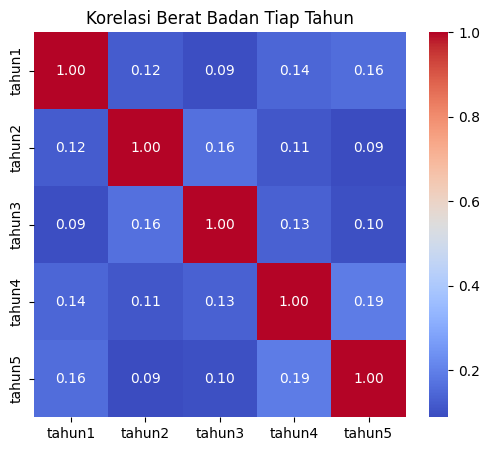

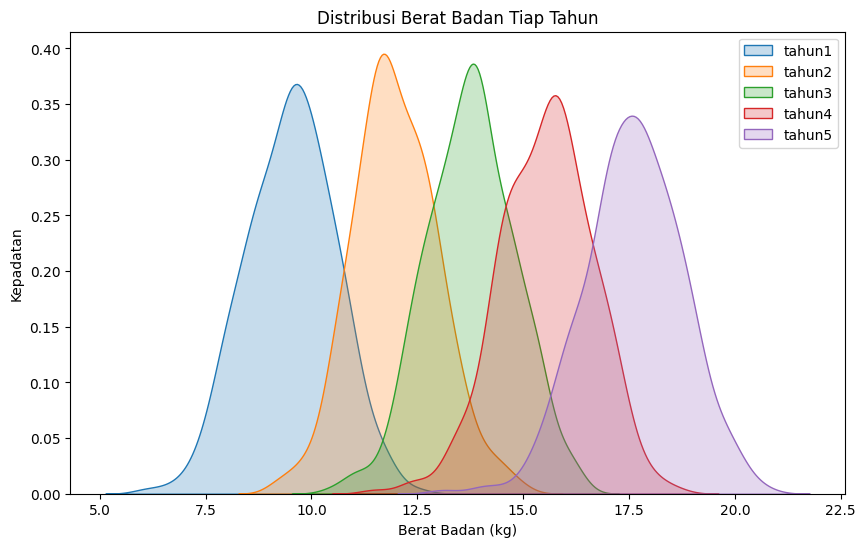

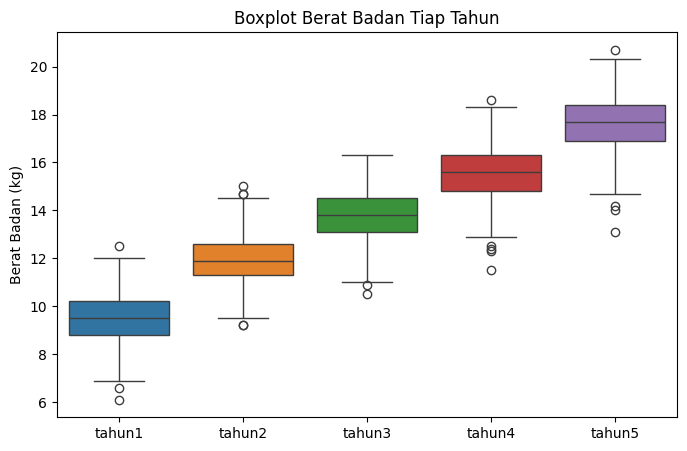

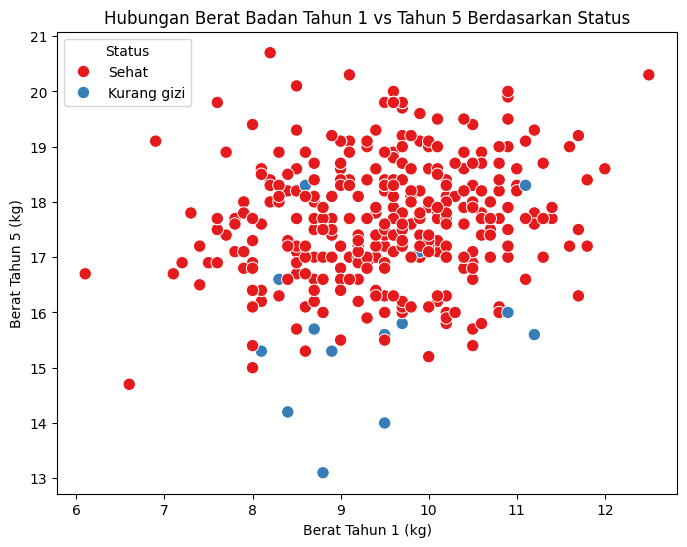

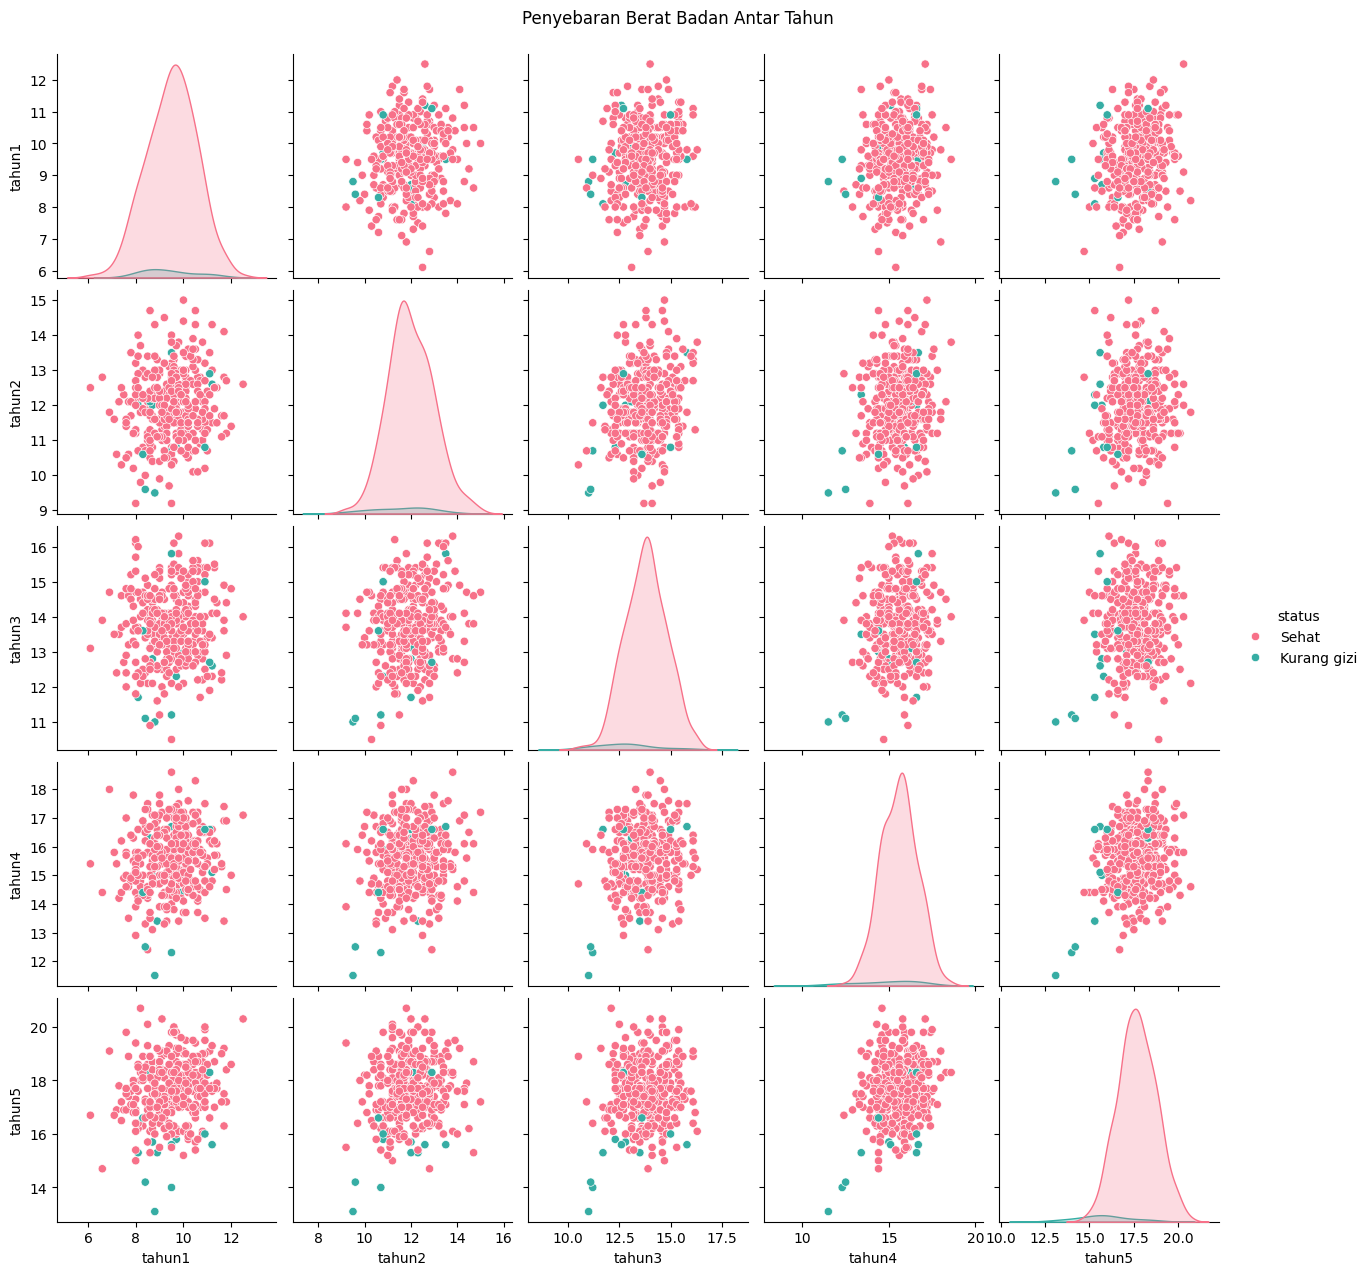

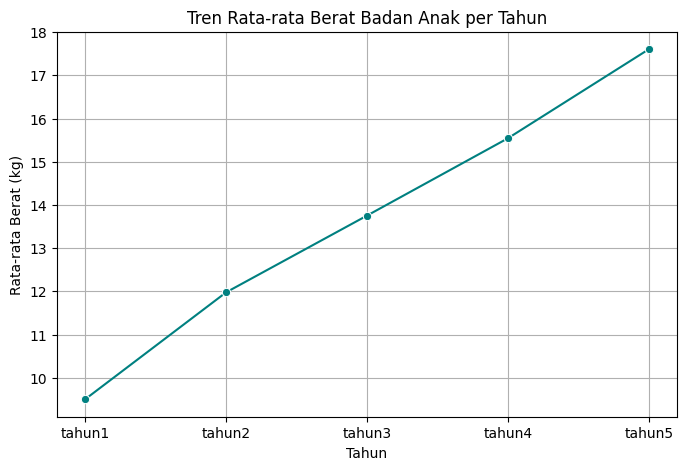

In [15]:
# ====== Segment 2: EDA ======

# Kolom berat badan tiap tahun
tahun_cols = ['tahun1','tahun2','tahun3','tahun4','tahun5']

# ===== Statistik Deskriptif =====
print("\n=== Statistik Deskriptif (Mean, Std, Min, Max, dll) ===")
display(df[tahun_cols].describe().T)

# ===== Statistik Tambahan =====
print("\n=== Statistik Tambahan (Median, Modus, Varians, Skewness, Kurtosis) ===")
stat_detail = pd.DataFrame({
    'mean': df[tahun_cols].mean(),
    'median': df[tahun_cols].median(),
    'modus': [df[c].mode()[0] for c in tahun_cols],
    'varian': df[tahun_cols].var(),
    'std_deviasi': df[tahun_cols].std(),
    'skewness': df[tahun_cols].skew(),
    'kurtosis': df[tahun_cols].kurt()
})
display(stat_detail)

# ===== Distribusi Status Kesehatan =====
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='status', palette='Set2')
plt.title('Distribusi Status Kesehatan Anak')
plt.xlabel('Status Kesehatan')
plt.ylabel('Jumlah')
plt.show()

# ===== Korelasi antar berat badan tiap tahun =====
plt.figure(figsize=(6,5))
sns.heatmap(df[tahun_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Berat Badan Tiap Tahun')
plt.show()

# ===== Distribusi Berat Badan per Tahun =====
plt.figure(figsize=(10,6))
for col in tahun_cols:
    sns.kdeplot(df[col], fill=True, label=col)
plt.title('Distribusi Berat Badan Tiap Tahun')
plt.xlabel('Berat Badan (kg)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

# ===== Boxplot untuk Deteksi Outlier =====
plt.figure(figsize=(8,5))
sns.boxplot(data=df[tahun_cols])
plt.title('Boxplot Berat Badan Tiap Tahun')
plt.ylabel('Berat Badan (kg)')
plt.show()

# ===== Scatter Plot: Hubungan Tahun 1 vs Tahun 5 =====
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='tahun1', y='tahun5', hue='status', palette='Set1', s=80)
plt.title('Hubungan Berat Badan Tahun 1 vs Tahun 5 Berdasarkan Status')
plt.xlabel('Berat Tahun 1 (kg)')
plt.ylabel('Berat Tahun 5 (kg)')
plt.legend(title='Status')
plt.show()

# ===== Pairplot untuk melihat penyebaran data antar tahun =====
sns.pairplot(df, vars=tahun_cols, hue='status', palette='husl', diag_kind='kde')
plt.suptitle('Penyebaran Berat Badan Antar Tahun', y=1.02)
plt.show()

# ===== Line Plot: Tren Rata-rata Berat Badan =====
mean_values = df[tahun_cols].mean()
plt.figure(figsize=(8,5))
sns.lineplot(x=tahun_cols, y=mean_values, marker='o', color='teal')
plt.title('Tren Rata-rata Berat Badan Anak per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Berat (kg)')
plt.grid(True)
plt.show()


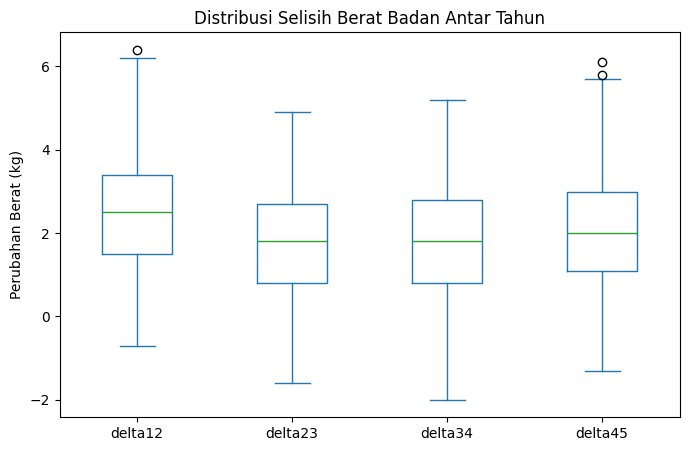

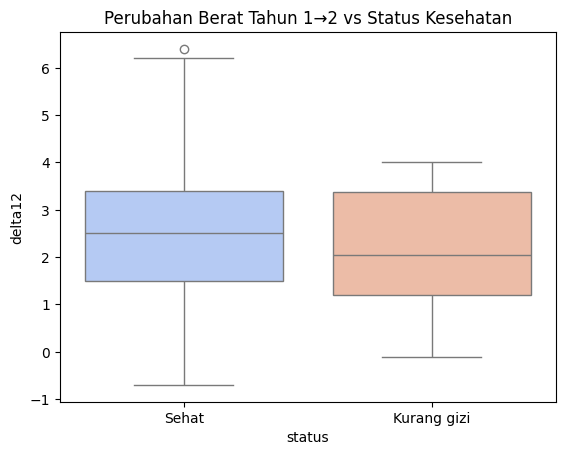

In [3]:
# ====== Segment 3: Fitur Selisih Berat Badan ======
# Hitung selisih antar tahun
df['delta12'] = df['tahun2'] - df['tahun1']
df['delta23'] = df['tahun3'] - df['tahun2']
df['delta34'] = df['tahun4'] - df['tahun3']
df['delta45'] = df['tahun5'] - df['tahun4']

# Visualisasi perubahan berat badan
delta_cols = ['delta12','delta23','delta34','delta45']
df[delta_cols].plot(kind='box', figsize=(8,5))
plt.title('Distribusi Selisih Berat Badan Antar Tahun')
plt.ylabel('Perubahan Berat (kg)')
plt.show()

# Cek tren pertumbuhan dengan status
sns.boxplot(data=df, x='status', y='delta12', palette='coolwarm')
plt.title('Perubahan Berat Tahun 1→2 vs Status Kesehatan')
plt.show()


In [7]:
# ====== Segment 4: Preprocessing (Fix Final) ======

# Isi nilai kosong riwayat penyakit (kalau ada)
df['riwayat_penyakit'] = df['riwayat_penyakit'].fillna('tidak ada')

# Encode kategori
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# Pastikan kolom teks tidak ada spasi kosong
df['riwayat_penyakit'] = np.where(df['riwayat_penyakit'].astype(str).str.strip() == '',
                                  'tidak ada', df['riwayat_penyakit'])

df['riwayat_penyakit'] = le.fit_transform(df['riwayat_penyakit'])
df['status'] = le.fit_transform(df['status'])

# Pilih fitur (selisih berat + riwayat penyakit)
delta_cols = ['delta12', 'delta23', 'delta34', 'delta45']
X = df[delta_cols + ['riwayat_penyakit']]
y = df['status']

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("✅ Data siap untuk modeling")
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji   : {X_test.shape[0]}")


✅ Data siap untuk modeling
Jumlah data latih: 280
Jumlah data uji   : 70


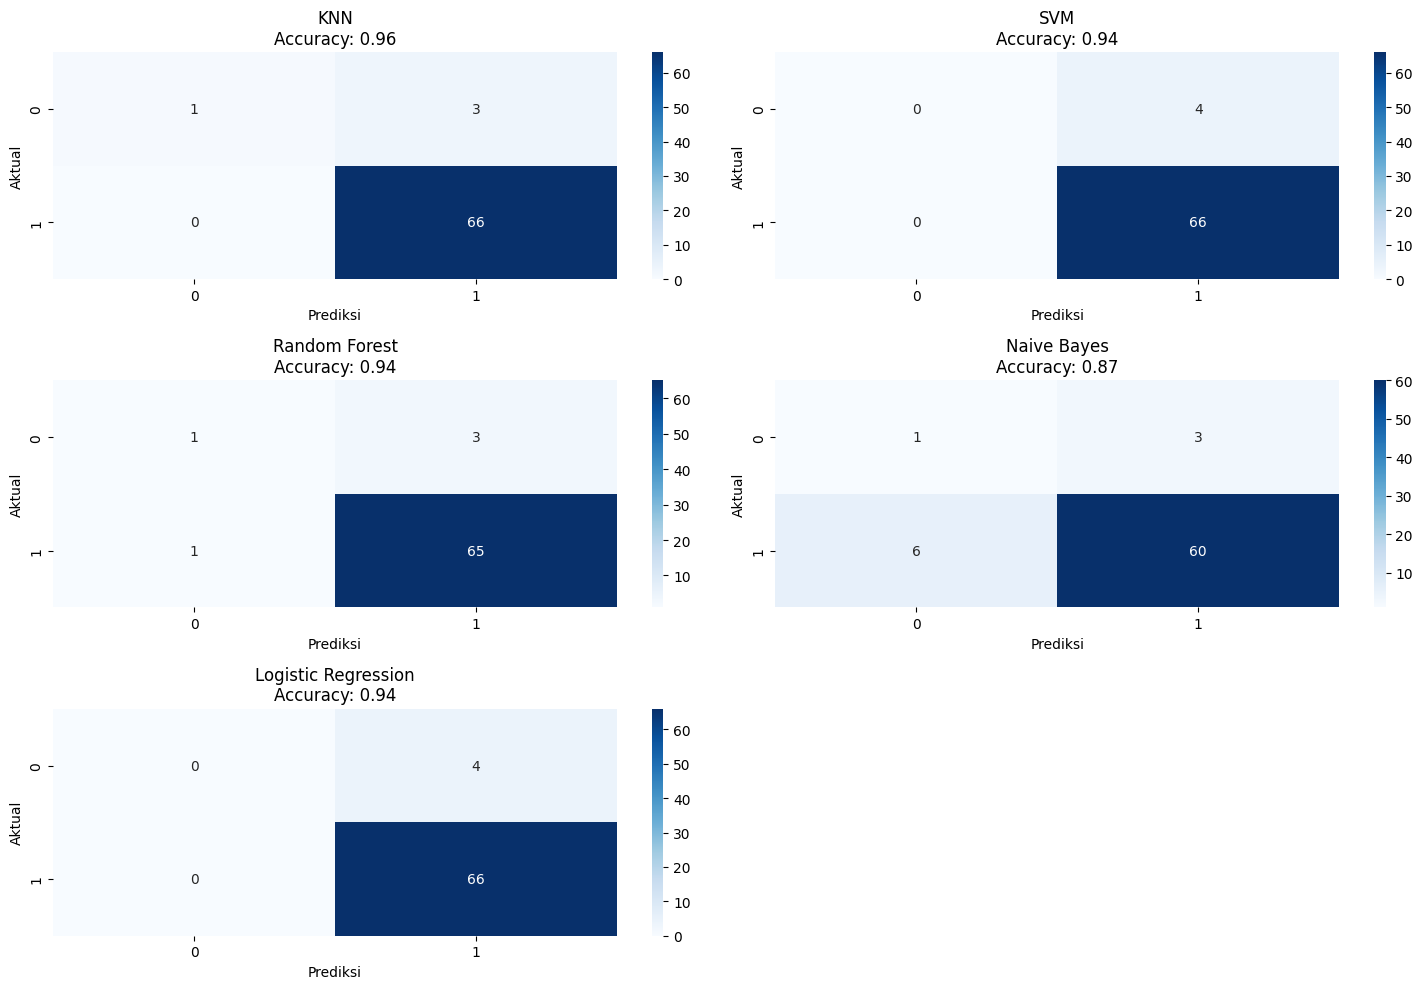

In [8]:
# ====== Segment 5: Modeling ======
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression()
}

results = {}
plt.figure(figsize=(15,10))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(3,2,i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}\nAccuracy: {acc:.2f}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')

plt.tight_layout()
plt.show()


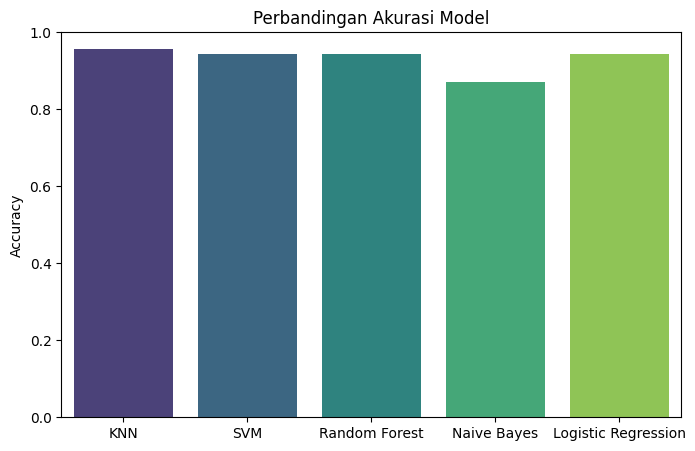

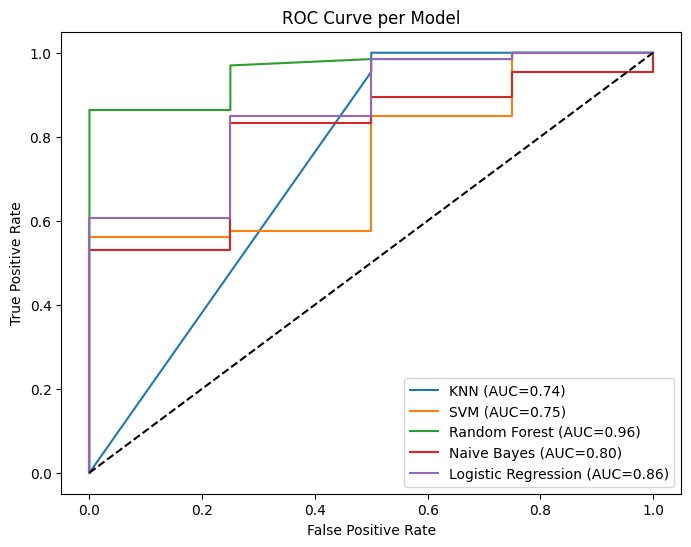

In [9]:
# ====== Segment 6: Evaluasi ======
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

# ROC Curve
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve per Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


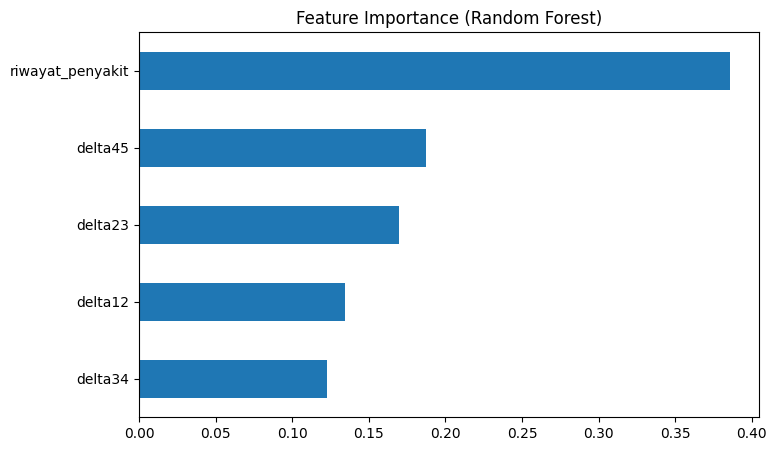


Feature importance menunjukkan variabel yang paling berpengaruh terhadap status kesehatan:


,0
riwayat_penyakit,0.385634
delta45,0.187196
delta23,0.169533
delta12,0.134707
delta34,0.122929


In [10]:
# ====== Segment 7: Interpretasi ======
rf = models['Random Forest']
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Feature Importance (Random Forest)')
plt.show()

print("\nFeature importance menunjukkan variabel yang paling berpengaruh terhadap status kesehatan:")
display(feat_importances.sort_values(ascending=False))
